In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D,LeakyReLU,Dropout,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10

Image Data Analysis
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
[6]
[9]
[9]
[4]
[1]
[1]
[2]
[7]
[8]


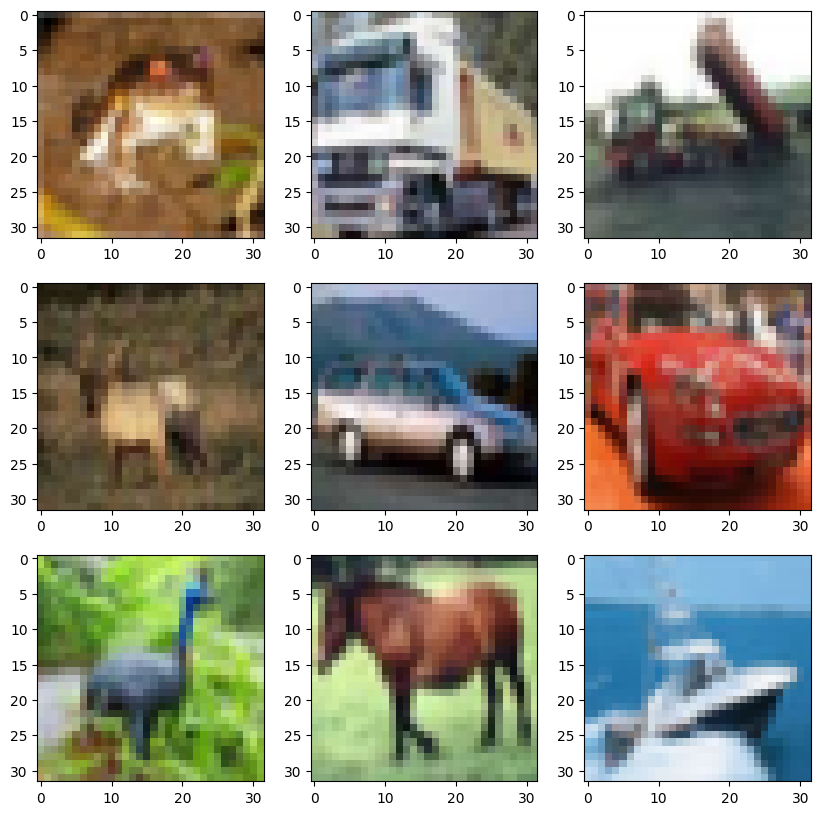

In [2]:
print("Image Data Analysis")
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

fig1=plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(xtrain[i])
    print(ytrain[i])
plt.show()

In [3]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding="same"))
classifier.add(LeakyReLU(negative_slope=0.3))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
classifier.add(Conv2D(128, (3, 3), input_shape=(32, 32, 3), activation='relu', padding="same"))
classifier.add(LeakyReLU(negative_slope=0.3))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))

In [5]:
classifier.add(Flatten())
classifier.add(Dense(1024))
classifier.add(LeakyReLU(negative_slope=0.3))
classifier.add(Dropout(0.25))
classifier.add(Dense(10, activation='softmax'))

In [6]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
xtrain = xtrain/255.0
xtest = xtest/255.0
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [8]:
history = classifier.fit(xtrain, ytrain, batch_size=128, epochs=3, validation_data=(xtest, ytest))

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 273s 695ms/step - accuracy: 0.3112 - loss: 1.9543 - val_accuracy: 0.5285 - val_loss: 1.3240
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 327s 709ms/step - accuracy: 0.5454 - loss: 1.2776 - val_accuracy: 0.6281 - val_loss: 1.0513
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 323s 711ms/step - accuracy: 0.6169 - loss: 1.0792 - val_accuracy: 0.6626 - val_loss: 0.9588


In [9]:
score=classifier.evaluate(xtest,ytest)
print("Evaluation Metrics - Loss")
print(score[0])
print("Evaluation Metrics - Accuracy")
print(score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.6677 - loss: 0.9507
Evaluation Metrics - Loss
0.9588017463684082
Evaluation Metrics - Accuracy
0.6625999808311462


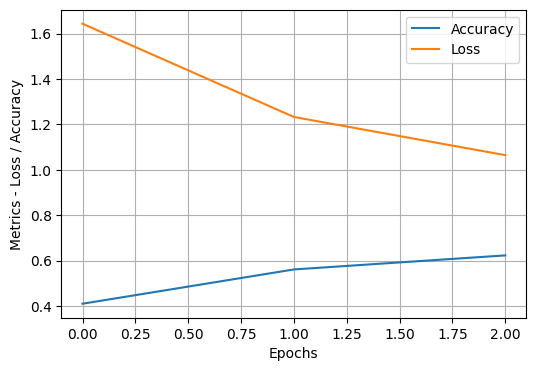

In [10]:
hdf = pd.DataFrame(history.history)
fig1 = plt.figure(figsize=(6,4))
plt.plot("accuracy",data=hdf, label="Accuracy")
plt.plot("loss",data=hdf, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Metrics - Loss / Accuracy")
plt.legend()
plt.grid()
plt.show(fig1)

In [11]:
#===== PREDICTION ===========
print("Prediction of Image Label")
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()
model1 = classifier
n1 = int(input("Enter a test sample id:"))

sample = xtest[n1].reshape((1,) + xtest[n1].shape)/255.0
sample1 = np.array(sample)

prediction1 = (model1.predict(sample))
print(prediction1)
out = np.argmax(prediction1, axis=1)
print(out)
print("Image label predicted is : ")
if (out==0):
  print("Airplane")
elif (out==1):
  print("Automobile")
elif (out==2):
  print("Bird")
elif (out==3):
  print("Cat")
elif (out==4):
  print("Deer")
elif (out==5):
  print("Dog")
elif (out==6):
  print("Frog")
elif (out==7):
  print("Horse")
elif (out==8):
  print("Ship")
elif (out==9):
  print("Truck")
else:
  print("Image not listed")

Prediction of Image Label
Enter a test sample id:1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
[[1.1560558e-02 2.0511954e-01 1.1734683e-05 9.0879366e-06 9.5148434e-06
  3.6728301e-07 4.9663049e-06 1.4899240e-06 7.7847612e-01 4.8066429e-03]]
[8]
Image label predicted is : 
Ship
